In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dijkstra Algorithm: Grid Version

In [11]:
def create_workspace(node_coor,start_node):
    workspace = []
    for i in range(len(node_coor)):
        workspace.append([float('Inf'),'_'])
    workspace[start_node] = [0,'XX']
    return workspace

def distance(node_coor,node1,node2):
    x1 = node_coor[node1][0]
    x2 = node_coor[node2][0]
    y1 = node_coor[node1][1]
    y2 = node_coor[node2][1]
    d_euclidean = ((x1-x2)**2 + (y1-y2)**2)**0.5
    d_manhattan = abs(x1-x2) + abs(y1-y2)
    return d_manhattan

def get_min_index(workspace,unvisited):
    check_dict = dict()
    for i in unvisited:
         check_dict[i] = workspace[i][0]
    if not check_dict == {}:
        return min(check_dict)
    else:
        return "NO ROUTE AVAILABLE"

Input

In [12]:
size = 20 # 20 by 20 Grid
wall_index = [114,113,133,153,173,193,213,233,253,273,272,271,270,269,268,288,308,309,310,311,312,313,314,315] # Missing (Unavailable) nodes
start_node = 42
end_node = 378

Important variables for creating grid

In [13]:
def get_neighbor(rstart,rstop,cstart,cstop,exclude):
    list1 = grid[rstart:rstop,cstart:cstop].tolist()
    list2 = []
    for i in list1:
        for j in i:
            list2.append(j)
    list2.remove(exclude)
    return list2

node_coor = []
for i in range(size):
    for j in range(size):
        node_coor.append((i,j))

node_index = [int(i) for i in range(len(node_coor))]

for n in wall_index:
    if n in node_index:
        index = node_index.index(n)
        node_index[index] = 'X'
    else: print("Unavailable Node")

grid = np.array(node_index).reshape((size,size))

ref = [(0,2)]
for i in range(size-2):
    ref.append((i,i+3))
ref.append((size-2,size))

neighbor = []
for r in range(len(grid)):
    for c in range(len(grid[i])):
        neighbor.append(get_neighbor(ref[r][0],ref[r][1],ref[c][0],ref[c][1],grid[r][c]))

for i in range(len(neighbor)):
    if 'X' in neighbor[i]:
        dummy_list = []
        for e in neighbor[i]:
            if e != 'X':
                dummy_list.append(int(e))
        neighbor[i] = dummy_list
    else:
        dummy_list = []
        for e in neighbor[i]:
                dummy_list.append(int(e))
        neighbor[i] = dummy_list

true_neighbor = []
for i in range(len(neighbor)):
    if i in wall_index:
        true_neighbor.append([])
    else:
        true_neighbor.append(neighbor[i])

Main Dijkstra program

In [14]:
visited = []
unvisited = [i for i in range(len(node_coor))]
workspace = create_workspace(node_coor,start_node)
next = start_node
while len(unvisited) != 0:
    for i in true_neighbor[next]:
        if i not in visited:
            d = workspace[next][0] + distance(node_coor,next,i)
            if d < workspace[i][0]:
                workspace[i][0] = d
                workspace[i][1] = next
    next = get_min_index(workspace,unvisited)
    visited.append(next)
    unvisited.remove(next)

Output

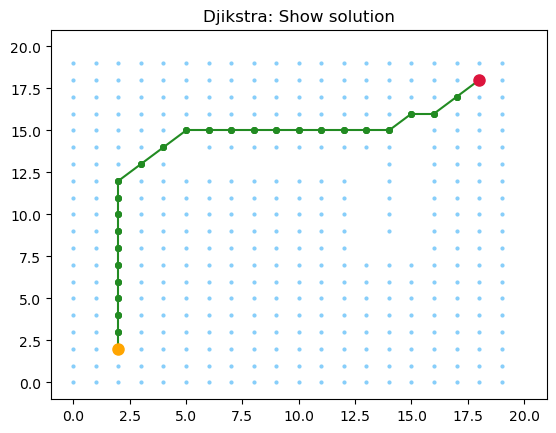

route= [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 73, 94, 115, 135, 155, 175, 195, 215, 235, 255, 275, 295, 316, 336, 357, 378]
distance =  32


In [15]:
route = [end_node]
track = workspace[route[-1]][1]
while track != 'XX':
    track = workspace[route[-1]][1]
    route.append(track)
route.remove('XX')

for i in visited:
    if i not in wall_index:
        plt.plot(node_coor[i][0],node_coor[i][1], marker='o',markersize=2, color='lightskyblue')
for i in route:
    plt.plot(node_coor[i][0],node_coor[i][1], marker='o',markersize=4, color='forestgreen')
for i in range(len(route)-1):
    x1 = node_coor[route[i]][0]
    x2 = node_coor[route[i+1]][0]
    y1 = node_coor[route[i]][1]
    y2 = node_coor[route[i+1]][1]
    plt.plot([x1,x2], [y1,y2], marker='o',markersize=4, color='forestgreen', linestyle="-")
plt.plot(node_coor[start_node][0],node_coor[start_node][1],marker='o',markersize=8, color='orange')
plt.plot(node_coor[end_node][0],node_coor[end_node][1], marker='o',markersize=8, color='crimson')
plt.title('Djikstra: Show solution')
plt.xlim(-1,size+1)
plt.ylim(-1,size+1)
plt.show()

print('route=', route[::-1])

d = 0
for i in range(len(route)-1):
    d += distance(node_coor,route[i],route[i+1])
print('distance = ', d)

# Dijkstra Algorithm: Coordinate Version

In [16]:
def show_nodes_with_links(node_coor,neighbor):
    c = 0
    for node in node_coor:
        x = node[0]
        y = node[1]
        plt.plot(x,y,'ko', markersize=4)
        plt.text(x+0.05,y+0.05, str(c) + '(' + str(x)+ ',' + str(y) + ')',fontsize=8)
        c += 1
    for i in range(len(neighbor)):
        for j in neighbor[i]:
            x1 = node_coor[i][0]
            x2 = node_coor[j][0]
            y1 = node_coor[i][1]
            y2 = node_coor[j][1]
            plt.plot([x1,x2], [y1,y2], marker='o',markersize=4, color='royalblue', linestyle="-")
            plt.text((x1+x2)/2,(y1+y2)/2, distance(node_coor,i,j),fontsize=8)
    plt.xlim(-1, 16)
    plt.ylim(-1, 16)
    plt.grid()
    plt.show()

def show_solution(node_coor,neighbor,route):
    c = 0
    for node in node_coor:
        x = node[0]
        y = node[1]
        plt.plot(x,y,'ko', markersize=4)
        plt.text(x+0.05,y+0.05, str(c) + '(' + str(x)+ ',' + str(y) + ')',fontsize=8)
        c += 1
    for i in range(len(neighbor)):
        for j in neighbor[i]:
            x1 = node_coor[i][0]
            x2 = node_coor[j][0]
            y1 = node_coor[i][1]
            y2 = node_coor[j][1]
            plt.plot([x1,x2], [y1,y2], marker='o',markersize=4, color='lightgray', linestyle="-")
            plt.text((x1+x2)/2,(y1+y2)/2, distance(node_coor,i,j),fontsize=8)
    for i in range(len(route)-1):
        x1 = node_coor[route[i]][0]
        x2 = node_coor[route[i+1]][0]
        y1 = node_coor[route[i]][1]
        y2 = node_coor[route[i+1]][1]
        plt.plot([x1,x2], [y1,y2], marker='o',markersize=4, color='mediumseagreen', linestyle="-")
        plt.text((x1+x2)/2,(y1+y2)/2, distance(node_coor,i,j),fontsize=8)
    plt.xlim(-1, 16)
    plt.ylim(-1, 16)
    plt.grid()
    plt.show()

def create_workspace(node_coor,start_node):
    workspace = []
    for i in range(len(node_coor)):
        workspace.append([float('Inf'),'_'])
    workspace[start_node] = [0,'XX']
    return workspace

def distance(node_coor,node1,node2):
    x1 = node_coor[node1][0]
    x2 = node_coor[node2][0]
    y1 = node_coor[node1][1]
    y2 = node_coor[node2][1]
    d_euclidean = ((x1-x2)**2 + (y1-y2)**2)**0.5
    d_manhattan = abs(x1-x2) + abs(y1-y2)
    return d_manhattan

def get_min_index(workspace,unvisited):
    check_dict = dict()
    for i in unvisited:
         check_dict[i] = workspace[i][0]
    if not check_dict == {}:
        return min(check_dict)
    else:
        return "NO ROUTE AVAILABLE"

Input

In [17]:
node_coor = [(0.6,7),(6.8,7.4),(12.9,5.7),(5.4,14.5),(9.2,11.8)]
neighbor = [[1,2],[0,2,3],[0,1,4],[1,2,4],[2,3]]
start_node = 0
end_node = 4
# start_node > end_node !!!

Main Dijkstra program

In [18]:
visited = []
unvisited = [i for i in range(len(node_coor))]
workspace = create_workspace(node_coor,start_node)
next = start_node
while len(unvisited) != 0:
    for i in neighbor[next]:
        if i not in visited:
            d = workspace[next][0] + distance(node_coor,next,i)
            if d < workspace[i][0]:
                workspace[i][0] = d
                workspace[i][1] = next
    next = get_min_index(workspace,unvisited)
    visited.append(next)
    unvisited.remove(next)

Output

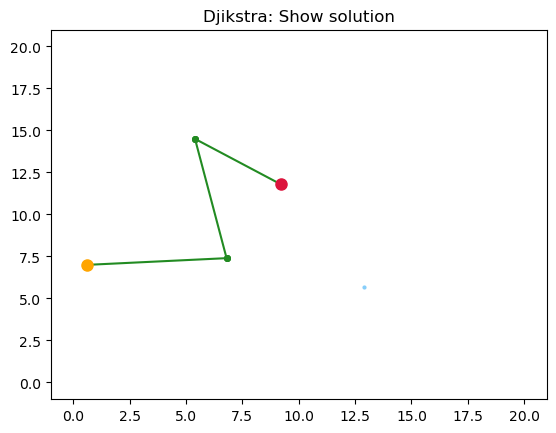

route= [0, 1, 3, 4]
distance =  21.599999999999998


In [19]:
route = [end_node]
track = workspace[route[-1]][1]
while track != 'XX':
    track = workspace[route[-1]][1]
    route.append(track)
route.remove('XX')

for i in visited:
    if i not in wall_index:
        plt.plot(node_coor[i][0],node_coor[i][1], marker='o',markersize=2, color='lightskyblue')
for i in route:
    plt.plot(node_coor[i][0],node_coor[i][1], marker='o',markersize=4, color='forestgreen')
for i in range(len(route)-1):
    x1 = node_coor[route[i]][0]
    x2 = node_coor[route[i+1]][0]
    y1 = node_coor[route[i]][1]
    y2 = node_coor[route[i+1]][1]
    plt.plot([x1,x2], [y1,y2], marker='o',markersize=4, color='forestgreen', linestyle="-")
plt.plot(node_coor[start_node][0],node_coor[start_node][1],marker='o',markersize=8, color='orange')
plt.plot(node_coor[end_node][0],node_coor[end_node][1], marker='o',markersize=8, color='crimson')
plt.title('Djikstra: Show solution')
plt.xlim(-1,size+1)
plt.ylim(-1,size+1)
plt.show()

print('route=', route[::-1])

d = 0
for i in range(len(route)-1):
    d += distance(node_coor,route[i],route[i+1])
print('distance = ', d)